In [3]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [4]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

In [5]:
folder = Path("../results_synced/stride/")

dfs = []
for file in folder.glob('*'):
    if ".csv" in file.name:
        dfp = pd.read_csv(file)
        dfp["window_stride"] = (np.mod(np.floor(dfp.index/2), 5)+1).astype(int)
        dfs.append(dfp)
df = pd.concat(dfs, ignore_index=True)

df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_nepochs,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_acc,pretrain_val_f1,pretrain_val_auroc,pretrain_best_model,pretrain_train_csv,pretrain_nepochs
0,GunPoint,CNN_DFS,False,1,0,128,5,1,0.644531,0.644531,...,120,6135,0,5985,NaN,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN_DFS,True,1,0,128,5,1,0.687012,0.687012,...,120,6135,18135,5985,0.916057,0.916057,0.989052,training/exp/EXP_stride_f1.0_2023-03-14_21-50/...,training/exp/EXP_stride_f1.0_2023-03-14_21-50/...,60.0
2,GunPoint,CNN_DFS,False,1,0,128,5,2,0.662109,0.662109,...,120,6120,0,5970,NaN,NaN,NaN,NaN,NaN,NaN
3,GunPoint,CNN_DFS,True,1,0,128,5,2,0.695801,0.695801,...,120,6120,18120,5970,0.919382,0.919382,0.989163,training/exp/EXP_stride_f1.1_2023-03-14_22-33/...,training/exp/EXP_stride_f1.1_2023-03-14_22-33/...,60.0
4,GunPoint,CNN_DFS,False,1,0,128,5,3,0.703125,0.703125,...,120,6105,0,5955,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GunPoint,CNN_DFS,True,3,0,128,5,3,0.634277,0.634277,...,120,6105,18105,5955,0.894614,0.894614,0.982748,training/exp/EXP_stride_f3.2_2023-03-15_06-47/...,training/exp/EXP_stride_f3.2_2023-03-15_06-47/...,60.0
96,GunPoint,CNN_DFS,False,3,0,128,5,4,0.600098,0.600098,...,120,6090,0,5940,NaN,NaN,NaN,NaN,NaN,NaN
97,GunPoint,CNN_DFS,True,3,0,128,5,4,0.669922,0.669922,...,120,6090,18090,5940,0.888797,0.888797,0.982885,training/exp/EXP_stride_f3.3_2023-03-15_07-34/...,training/exp/EXP_stride_f3.3_2023-03-15_07-34/...,60.0
98,GunPoint,CNN_DFS,False,3,0,128,5,5,0.652832,0.652832,...,120,6075,0,5925,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dfp = df.groupby(["arch", "dataset", "window_stride", "pretrained"])[["target_val_acc", "target_test_acc"]].mean().reset_index()
dfp

,arch,dataset,window_stride,pretrained,target_val_acc,target_test_acc
0,CNN_DFS,Coffee,1,False,0.601406,0.491526
1,CNN_DFS,Coffee,1,True,0.710313,0.561759
2,CNN_DFS,Coffee,2,False,0.601094,0.504257
3,CNN_DFS,Coffee,2,True,0.584219,0.496930
4,CNN_DFS,Coffee,3,False,0.601562,0.515996
5,CNN_DFS,Coffee,3,True,0.614844,0.524224
6,CNN_DFS,Coffee,4,False,0.632639,0.524950
7,CNN_DFS,Coffee,4,True,0.706597,0.556225
8,CNN_DFS,Coffee,5,False,0.662674,0.526233
9,CNN_DFS,Coffee,5,True,0.688194,0.540907


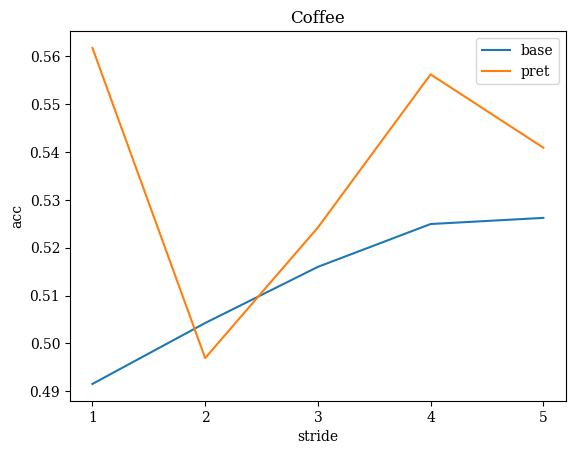

In [10]:
dataset = "GunPoint"
dataset = "Coffee"

metric = "acc"
dfp = dfp[dfp["dataset"] == dataset]

plt.figure()
plt.title(dataset)
plt.plot(dfp[dfp["pretrained"] == False]["window_stride"],dfp[dfp["pretrained"] == False][f"target_test_{metric}"], label="base")  
plt.plot(dfp[dfp["pretrained"] == True]["window_stride"],dfp[dfp["pretrained"] == True][f"target_test_{metric}"], label="pret") 
plt.xticks(dfp["window_stride"].unique())
plt.ylabel(metric)
plt.xlabel("stride")
plt.legend() 